<a href="https://colab.research.google.com/github/iamadi1709/Cifar-10-images-Classification-Neural-network/blob/main/dataAnalysisMovieLens_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,299 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,069 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Pack

In [2]:
# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
# Unzip the file
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [3]:
!pip install -q findspark

In [4]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.1-bin-hadoop3.2'

In [5]:
!ls

sample_data  spark-3.2.1-bin-hadoop3.2	spark-3.2.1-bin-hadoop3.2.tgz


In [6]:
import findspark
findspark.init()

In [7]:
findspark.find()

'/content/spark-3.2.1-bin-hadoop3.2'

In [8]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=7490929f82a277493e99c042f0d41e7fde3bab368b9a2769403539d0dd3ab58d
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [9]:
import pyspark
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [10]:
from pyspark import SparkConf
from pyspark.context import SparkContext

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [11]:
data = [1, 2, 3, 4, 5]
distData = sc.parallelize(data)

In [12]:
distData.collect()

[1, 2, 3, 4, 5]

In [13]:
distData.top(2)

[5, 4]

In [14]:
distData.take(3)

[1, 2, 3]

In [15]:
distData.first()

1

In [16]:
distData.count()

5

In [17]:
distData.reduce(lambda x,y : x+y)

15

In [18]:
mappedData=distData.map(lambda x:x*x)

In [19]:
mappedData.collect()

[1, 4, 9, 16, 25]

In [20]:
m=sc.parallelize([('apple',1),('orange',5),('apple',6),('orange',3)]).keys() 

In [21]:
m.collect()

['apple', 'orange', 'apple', 'orange']

In [22]:
m=sc.parallelize([('apple',1),('orange',5),('apple',6),('orange',3)]).values()

In [23]:
m.collect()

[1, 5, 6, 3]

In [24]:
collection =['a', 'b', 'c','d','e']

In [25]:
rddfromcollection =sc.parallelize(collection)

In [26]:
rddfromcollection.collect()

['a', 'b', 'c', 'd', 'e']

In [27]:
rdd = sc.parallelize(["Hello VIT Hi VIT Welcome VIT"])
counts = rdd.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .collect()
print(counts)

[('Hello', 1), ('VIT', 3), ('Hi', 1), ('Welcome', 1)]


In [28]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [29]:
#Load data
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

--2023-02-24 10:35:44--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  16.4MB/s    in 0.3s    

2023-02-24 10:35:44 (16.4 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [30]:
#Load data
user_data = sc.textFile("/content/ml-100k/u.user")

In [31]:
user_data.take(5)

['1|24|M|technician|85711',
 '2|53|F|other|94043',
 '3|23|M|writer|32067',
 '4|24|M|technician|43537',
 '5|33|F|other|15213']

In [32]:
#count number of users
user_fields = user_data.map(lambda line: line.split("|"))
num_users = user_fields.map(lambda fields: fields[0]).count()

In [33]:
#count number of genders
num_genders = user_fields.map(lambda fields:
fields[2]).distinct().count()

In [34]:
#count number of Occupations
num_occupations = user_fields.map(lambda fields:
fields[3]).distinct().count()

In [35]:
#count number of zipcodes
num_zipcodes = user_fields.map(lambda fields:
fields[4]).distinct().count()

In [36]:
print("Users: ",num_users, "Genders:",num_genders,"Occupation:", num_occupations, "ZipCodes:",num_zipcodes)

Users:  943 Genders: 2 Occupation: 21 ZipCodes: 795


In [37]:
import matplotlib.pyplot as plt
import numpy as np

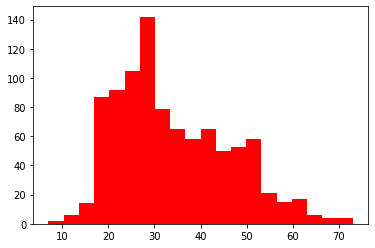

In [39]:
#a histogram to analyze the distribution of user ages
ages = user_fields.map(lambda x: int(x[1])).collect()
plt.hist(ages, bins=20, color='red')
plt.show()

In [40]:
#frequencies of the various occupations of our users
#mapreduce to count occurences of each occupation
#Whenever we give collect function rdd will be converted into list.

count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])

In [41]:
user_fields.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

#Sort the count data
First create 2 numpy arrays - use argsort method of numpy select elements of each array

In [42]:
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

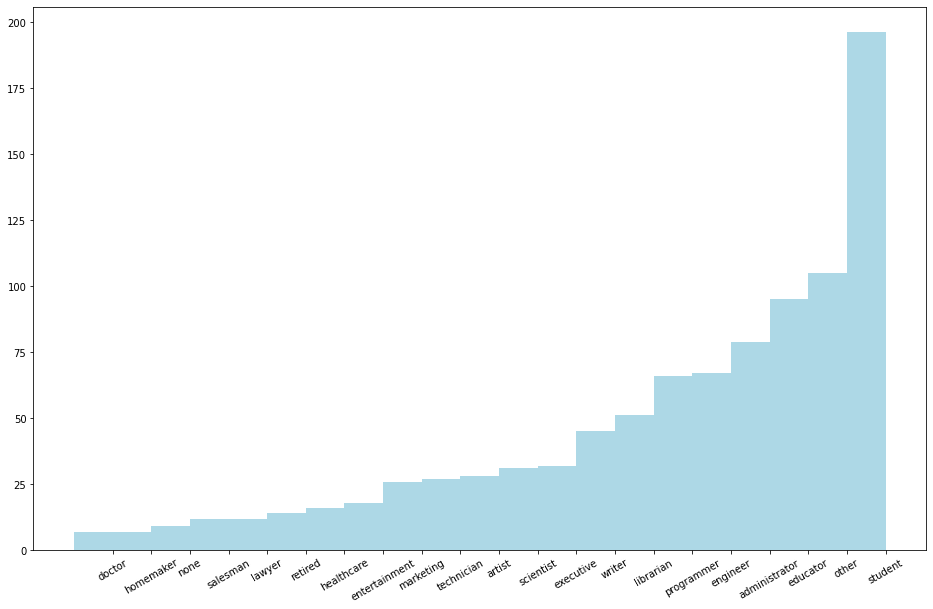

In [43]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)
plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

In [44]:
#count by occupation
count_by_occupation2 = user_fields.map(lambda fields: fields[3]).countByValue()
print ("Map-reduce approach:")
print (dict(count_by_occupation2))
print ("")
print ("countByValue approach:")
print (dict(count_by_occupation))

Map-reduce approach:
{'technician': 27, 'other': 105, 'writer': 45, 'executive': 32, 'administrator': 79, 'student': 196, 'lawyer': 12, 'educator': 95, 'scientist': 31, 'entertainment': 18, 'programmer': 66, 'librarian': 51, 'homemaker': 7, 'artist': 28, 'engineer': 67, 'marketing': 26, 'none': 9, 'healthcare': 16, 'retired': 14, 'salesman': 12, 'doctor': 7}

countByValue approach:
{'other': 105, 'executive': 32, 'administrator': 79, 'student': 196, 'educator': 95, 'programmer': 66, 'homemaker': 7, 'artist': 28, 'engineer': 67, 'none': 9, 'retired': 14, 'doctor': 7, 'technician': 27, 'writer': 45, 'lawyer': 12, 'scientist': 31, 'entertainment': 18, 'librarian': 51, 'marketing': 26, 'healthcare': 16, 'salesman': 12}


In [45]:
#movie data file

movie_data = sc.textFile("/content/ml-100k/u.item")
print(movie_data.take(5))
num_movies = movie_data.count()
print("Movies: ", num_movies)

['1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0', '2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0', '3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0', '4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0', '5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0']
Movies:  1682


In [46]:
def convert_year(x):
 try:
   return int(x[-4:])

 except:
   return 1900 # there is a 'bad' data point with a blank year, which we set to 1900 and will filter out later

In [47]:
movie_fields = movie_data.map(lambda lines: lines.split("|"))
years = movie_fields.map(lambda fields: fields[2]).map(lambda x: convert_year(x))

In [48]:
#Data exploration is very important as real-world dataseta are messy---needs parsing of data
#filter the bad values
years_filtered = years.filter(lambda x: x != 1900)

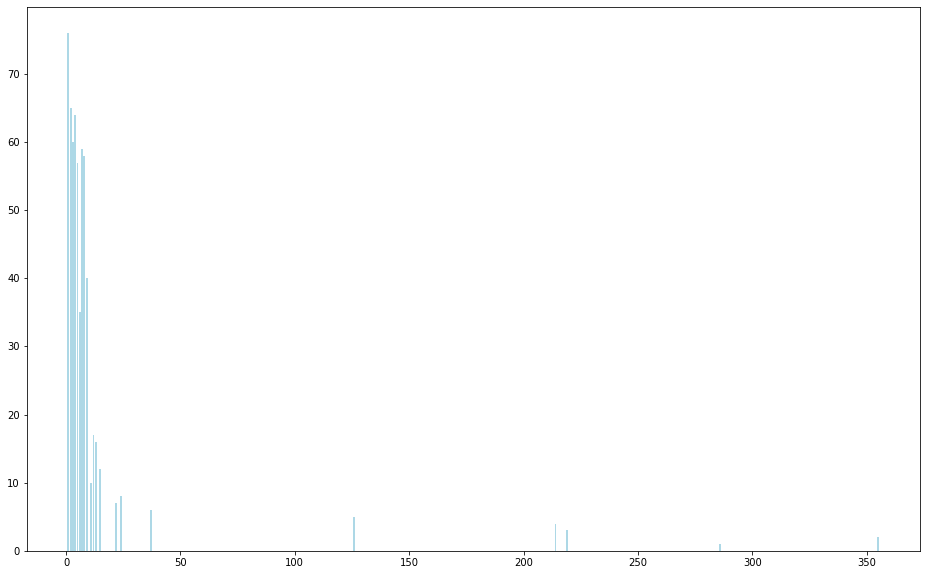

In [49]:
# transform the list of movie release years into movie ages by subtracting the current year
movie_ages = years_filtered.map(lambda yr: 1998-yr).countByValue()
values = movie_ages.values()
bins = movie_ages.keys()
type(bins)
#plt.hist(values, list(bins), color='lightblue')

plt.bar(values, list(bins), color='lightblue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16,10)
plt.show()


In [50]:
rating_data_raw = sc.textFile("/content/ml-100k/u.data")
print(rating_data_raw.first())
num_ratings = rating_data_raw.count()
print("Ratings:", num_ratings)

196	242	3	881250949
Ratings: 100000


In [51]:
rating_data = rating_data_raw.map(lambda line: line.split("\t"))
ratings = rating_data.map(lambda fields: int(fields[2]))
max_rating = ratings.reduce(lambda x, y: max(x, y))
min_rating = ratings.reduce(lambda x, y: min(x, y))
mean_rating = ratings.reduce(lambda x, y: x + y) / num_ratings
median_rating = np.median(ratings.collect())
ratings_per_user = num_ratings / num_users
ratings_per_movie = num_ratings / num_movies
print("Min rating:", min_rating)
print("Max rating:", max_rating)
print("Average rating:", mean_rating)
print("Median rating:", median_rating)
print("Average # of ratings per user:", ratings_per_user)
print("Average # of ratings per movie:", ratings_per_movie)

Min rating: 1
Max rating: 5
Average rating: 3.52986
Median rating: 4.0
Average # of ratings per user: 106.04453870625663
Average # of ratings per movie: 59.45303210463734


In [52]:
ratings.stats()

(count: 100000, mean: 3.5298600000000024, stdev: 1.125667970762251, max: 5.0, min: 1.0)

In [53]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating
 
# Load and parse the data
data = sc.textFile("/content/spark-3.2.1-bin-hadoop3.2/data/mllib/als/test.data")
ratings = data.map(lambda l: l.split(','))\
    .map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))
 
# Build the recommendation model using Alternating Least Squares
rank = 10
numIterations = 10
model = ALS.trainImplicit(ratings, rank, numIterations, alpha=0.01)
 
# Evaluate the model on training data
testdata = ratings.map(lambda p: (p[0], p[1]))
predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), r[2]))
ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error = " + str(MSE))
 
# Save and load model
model.save(sc, "target/tmp/myCollaborativeFilter")
sameModel = MatrixFactorizationModel.load(sc, "target/tmp/myCollaborativeFilter")

Mean Squared Error = 8.014934905662912


In [54]:
data.collect()

['1,1,5.0',
 '1,2,1.0',
 '1,3,5.0',
 '1,4,1.0',
 '2,1,5.0',
 '2,2,1.0',
 '2,3,5.0',
 '2,4,1.0',
 '3,1,1.0',
 '3,2,5.0',
 '3,3,1.0',
 '3,4,5.0',
 '4,1,1.0',
 '4,2,5.0',
 '4,3,1.0',
 '4,4,5.0']

In [55]:
ratings.collect()

[Rating(user=1, product=1, rating=5.0),
 Rating(user=1, product=2, rating=1.0),
 Rating(user=1, product=3, rating=5.0),
 Rating(user=1, product=4, rating=1.0),
 Rating(user=2, product=1, rating=5.0),
 Rating(user=2, product=2, rating=1.0),
 Rating(user=2, product=3, rating=5.0),
 Rating(user=2, product=4, rating=1.0),
 Rating(user=3, product=1, rating=1.0),
 Rating(user=3, product=2, rating=5.0),
 Rating(user=3, product=3, rating=1.0),
 Rating(user=3, product=4, rating=5.0),
 Rating(user=4, product=1, rating=1.0),
 Rating(user=4, product=2, rating=5.0),
 Rating(user=4, product=3, rating=1.0),
 Rating(user=4, product=4, rating=5.0)]

In [56]:
testdata.collect()

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

In [57]:
predictions.collect()

[((4, 4), 0.9962697522713009),
 ((4, 2), 0.9962697522713009),
 ((4, 1), 0.9962697522713009),
 ((4, 3), 0.9962697522713009),
 ((2, 4), 0.9962697522713009),
 ((2, 2), 0.9962697522713009),
 ((2, 1), 0.9962697522713009),
 ((2, 3), 0.9962697522713009),
 ((1, 4), 0.9962697522713009),
 ((1, 2), 0.9962697522713009),
 ((1, 1), 0.9962697522713009),
 ((1, 3), 0.9962697522713009),
 ((3, 4), 0.9962697522713009),
 ((3, 2), 0.9962697522713009),
 ((3, 1), 0.9962697522713009),
 ((3, 3), 0.9962697522713009)]

In [58]:
ratesAndPreds.collect()

[((1, 1), (5.0, 0.9962697522713009)),
 ((2, 4), (1.0, 0.9962697522713009)),
 ((3, 3), (1.0, 0.9962697522713009)),
 ((4, 2), (5.0, 0.9962697522713009)),
 ((1, 2), (1.0, 0.9962697522713009)),
 ((2, 3), (5.0, 0.9962697522713009)),
 ((3, 4), (5.0, 0.9962697522713009)),
 ((4, 1), (1.0, 0.9962697522713009)),
 ((1, 3), (5.0, 0.9962697522713009)),
 ((2, 2), (1.0, 0.9962697522713009)),
 ((3, 1), (1.0, 0.9962697522713009)),
 ((4, 4), (5.0, 0.9962697522713009)),
 ((1, 4), (1.0, 0.9962697522713009)),
 ((2, 1), (5.0, 0.9962697522713009)),
 ((3, 2), (5.0, 0.9962697522713009)),
 ((4, 3), (1.0, 0.9962697522713009))]